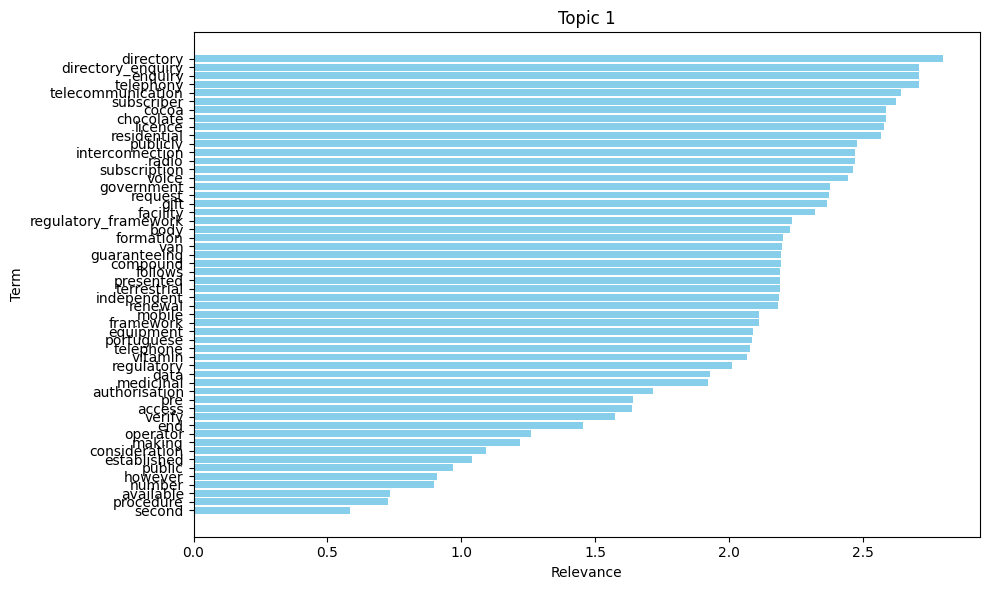

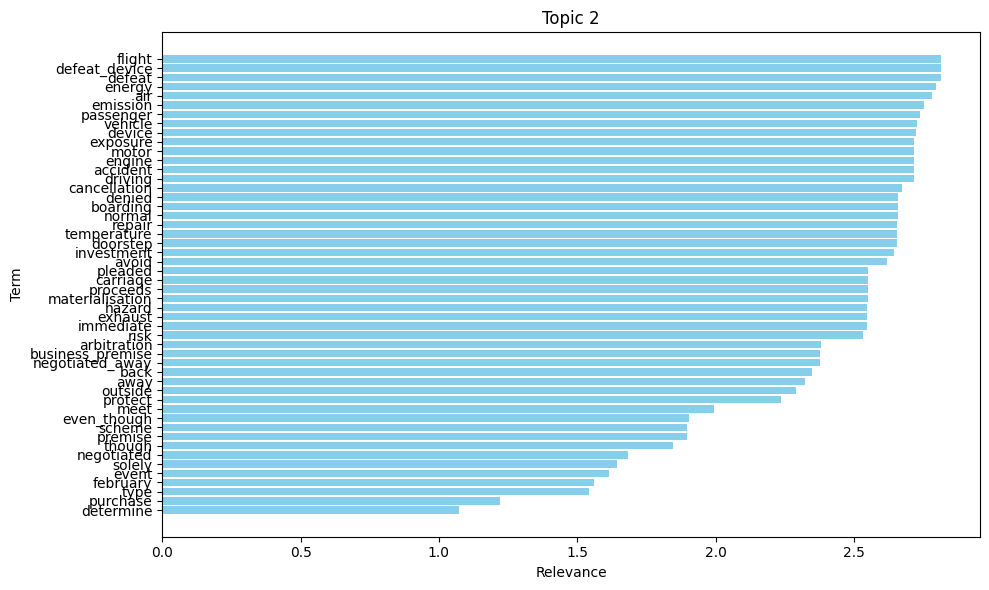

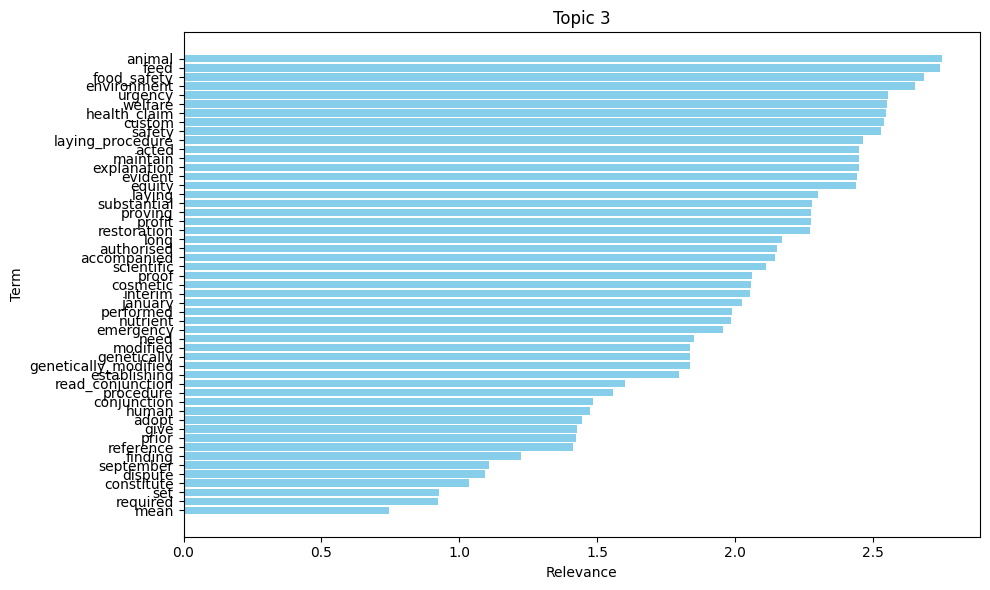

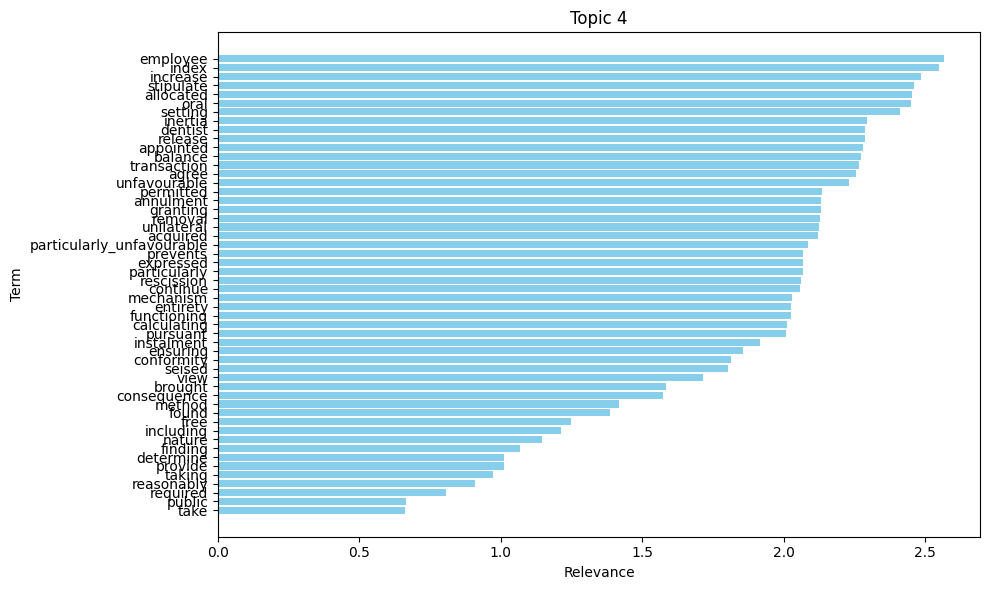

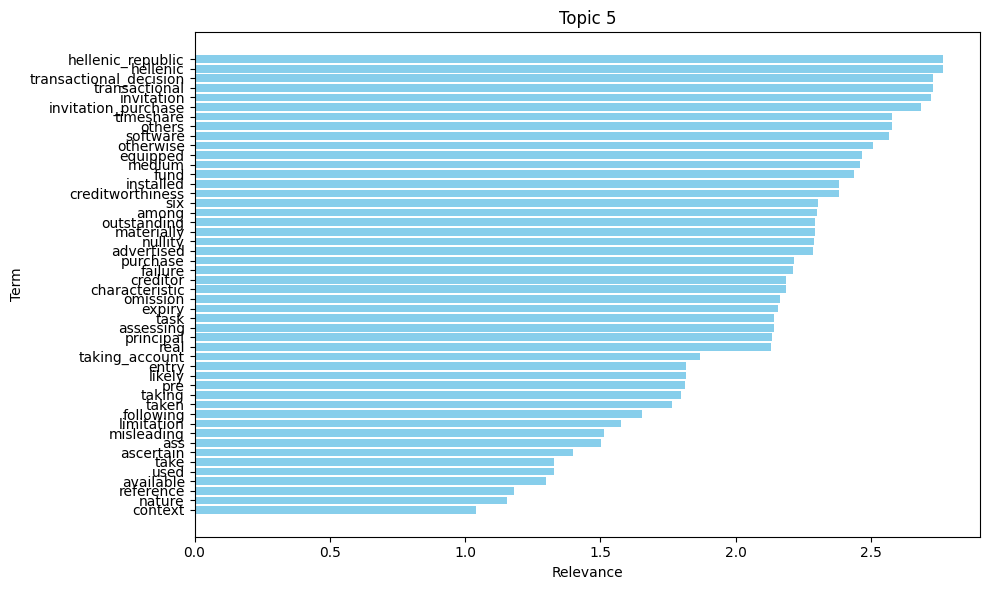

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


files = [
    'sorted_terms_topic_1.csv',
    'sorted_terms_topic_2.csv',
    'sorted_terms_topic_3.csv',
    'sorted_terms_topic_4.csv',
    'sorted_terms_topic_5.csv'
]

for i, file in enumerate(files):

    df = pd.read_csv(file)
    
    df = df.sort_values(by='relevance', ascending=False)
    

    plt.figure(figsize=(10, 6))

    plt.barh(df['Term'], df['relevance'], color='skyblue')
    plt.title(f'Topic {i + 1}')
    plt.xlabel('Relevance')
    plt.ylabel('Term')
    
    
    plt.gca().invert_yaxis()
    

    plt.tight_layout()
    
  
    plt.show()



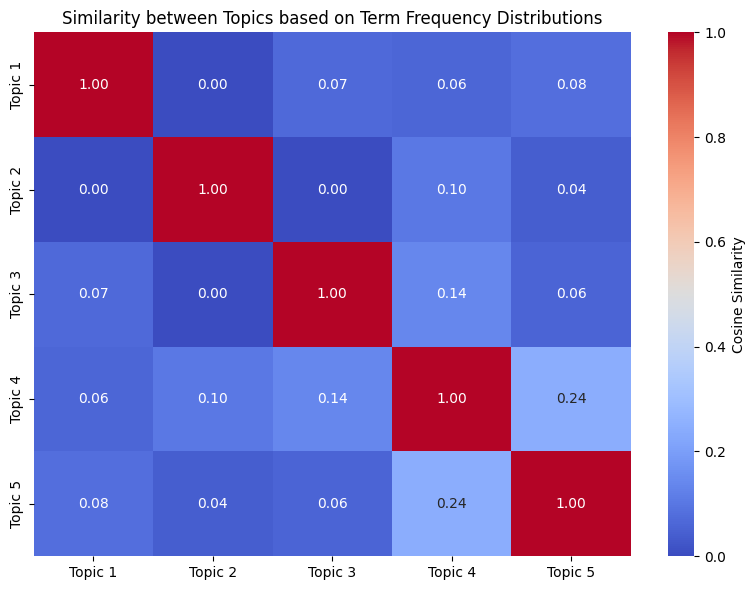

Term Frequencies for Topic 1:
Term
access         30.435524
accident        0.000000
accompanied     0.000000
acquired        0.000000
acted           0.000000
                 ...    
verify         19.839699
view            0.000000
vitamin         8.121846
voice           2.710577
welfare         0.000000
Name: Total, Length: 243, dtype: float64

Term Frequencies for Topic 2:
Term
access         0.000000
accident       4.549883
accompanied    0.000000
acquired       0.000000
acted          0.000000
                 ...   
verify         0.000000
view           0.000000
vitamin        0.000000
voice          0.000000
welfare        0.000000
Name: Total, Length: 243, dtype: float64

Term Frequencies for Topic 3:
Term
access         0.000000
accident       0.000000
accompanied    8.125779
acquired       0.000000
acted          4.507689
                 ...   
verify         0.000000
view           0.000000
vitamin        0.000000
voice          0.000000
welfare        2.719875
Name: To

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

files = [
    'sorted_terms_topic_1.csv',
    'sorted_terms_topic_2.csv',
    'sorted_terms_topic_3.csv',
    'sorted_terms_topic_4.csv',
    'sorted_terms_topic_5.csv'
]

term_frequencies = []
all_terms = set()

for file in files:
    df = pd.read_csv(file)
    all_terms.update(df['Term'].tolist())  

all_terms = sorted(all_terms)

for file in files:
    df = pd.read_csv(file)
    term_freq = df.set_index('Term')['Total'].reindex(all_terms, fill_value=0)
    term_frequencies.append(term_freq)

tf_df = pd.DataFrame(term_frequencies, index=[f'Topic {i + 1}' for i in range(len(files))], columns=all_terms)
tf_matrix = tf_df.values

similarity_matrix = cosine_similarity(tf_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=[f'Topic {i + 1}' for i in range(len(files))], columns=[f'Topic {i + 1}' for i in range(len(files))])

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Similarity between Topics based on Term Frequency Distributions')
plt.tight_layout()
plt.show()

for i, tf in enumerate(term_frequencies):
    print(f"Term Frequencies for Topic {i + 1}:")
    print(tf)
    print()
